In [60]:
print("init...")
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
print("init done.")



init...
init done.


In [61]:
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

Данные из предоставленного датасета

            Deaths
Date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
...            ...
2020-07-23   12873
2020-07-24   13026
2020-07-25   13172
2020-07-26   13249
2020-07-27   13334

[188 rows x 1 columns]


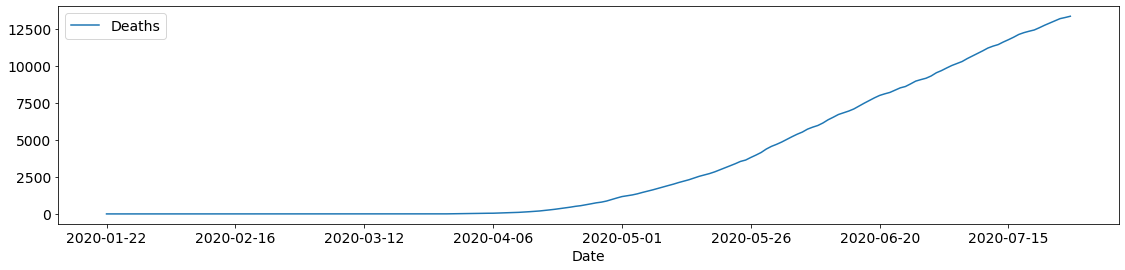

In [62]:
data=pd.read_csv("data/full_grouped.csv")
data=data.loc[data['Country/Region'] == "Russia"]
data.drop("Country/Region",1, inplace=True)
data.drop("WHO Region",1, inplace=True)
y=data.loc[:,["Date","Deaths"]]
y=y.set_index(["Date"])
# y2=y.copy()
# y2=y2[-10:]
# y=y[:-10]
print(y)
# print(y2)
y.plot(figsize=(19,4))
# y2.plot(figsize=(19,4))
plt.show()

Данные из Yandex DataLens

            Смертей
Дата               
03.01.2021    57730
04.01.2021    58203
05.01.2021    58706
06.01.2021    59137
07.01.2021    59628
...             ...
28.12.2021   299983
29.12.2021   300886
30.12.2021   301791
31.12.2021   302671
01.01.2022   303496

[364 rows x 1 columns]


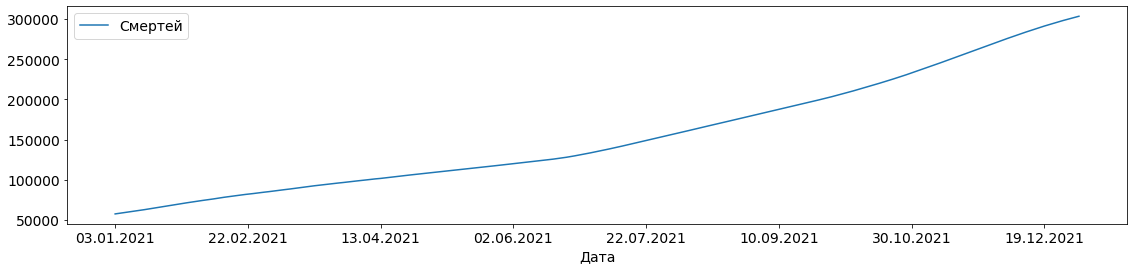

In [63]:
data=pd.read_csv("data/covid.csv", sep=";")
data=data.loc[data['Страна'] == "Россия"]
# data["Дата"]=pd.to_datetime(data["Дата"])
# data.sort_values(by=["Дата"], inplace=True)
data.drop("Страна",1, inplace=True)
y=data.loc[:,["Дата","Смертей"]]
y=y.set_index(["Дата"])
print(y)
y.plot(figsize=(19,4))
plt.show()

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [65]:
aic_full = pd.DataFrame(np.zeros((6,6), dtype=float))
# aic_miss = pd.DataFrame(np.zeros((6,6), dtype=float))
# Iterate over all ARMA(p,q) models with p,q in [0,6]
for p in range(6):
    for q in range(6):
        if p == 0 and q == 0:
            continue

        # Estimate the model with no missing datapoints
        mod = sm.tsa.statespace.SARIMAX(y, order=(p,0,q), enforce_invertibility=False)
        try:
            res = mod.fit(disp=False)
            aic_full.iloc[p,q] = res.aic
        except:
            aic_full.iloc[p,q] = np.nan
            
        #        # Estimate the model with missing datapoints
        # mod = sm.tsa.statespace.SARIMAX(y2, order=(p,0,q), enforce_invertibility=False)
        # try:
        #     res = mod.fit(disp=False)
        #     aic_miss.iloc[p,q] = res.aic
        # except:
        #     aic_miss.iloc[p,q] = np.nan


In [66]:
print(aic_full,"\n")
aic_filter=np.nan_to_num(aic_full)
i,j=np.where(aic_filter==np.min(aic_filter[np.nonzero(aic_filter)]))
print("min aic[%s][%s]:"%(j[0],i[0]) ,aic_full[j[0]][i[0]])
print("ARIMA(%s,%s)"%(i[0],j[0]))

             0            1            2            3             4  \
0     0.000000  9537.113080  9478.958456  9468.879007  11788.386842   
1  5852.607287  5366.450466  4999.743946  4665.595457   4580.414401   
2  3664.066819  3593.650007  5798.541844  5297.271802   4886.446431   
3  3818.447668  3592.217656  3594.452862  3580.764816   3577.408696   
4  3779.507745  3781.137295  3629.309418  3675.795609   3749.925617   
5  3780.718231  3755.838276    16.000000  3946.511924   3797.241008   

              5  
0  11813.981877  
1   4482.958253  
2   4558.365064  
3   3775.840349  
4   3739.666310  
5   3849.972929   

min aic[2][5]: 16.0
ARIMA(5,2)


In [67]:
# print(aic_miss,"\n")
# aic_filter=np.nan_to_num(aic_miss)
# i,j=np.where(aic_filter==np.min(aic_filter[np.nonzero(aic_filter)]))
# print("min aic[%s][%s]:"%(j[0],i[0]) ,aic_miss[j[0]][i[0]])
# print("ARIMA(%s,%s)"%(i[0],j[0]))

In [68]:
mod = sm.tsa.statespace.SARIMAX(y, order=(i[0],0,j[0]))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                Смертей   No. Observations:                  364
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -1791.806
Date:                Mon, 03 Jan 2022   AIC                           3599.612
Time:                        02:12:04   BIC                           3630.789
Sample:                             0   HQIC                          3612.003
                                - 364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0544      0.008     -6.960      0.000      -0.070      -0.039
ar.L2          1.9299      0.008    234.918      0.000       1.914       1.946
ar.L3          0.2086      0.018     11.732      0.0

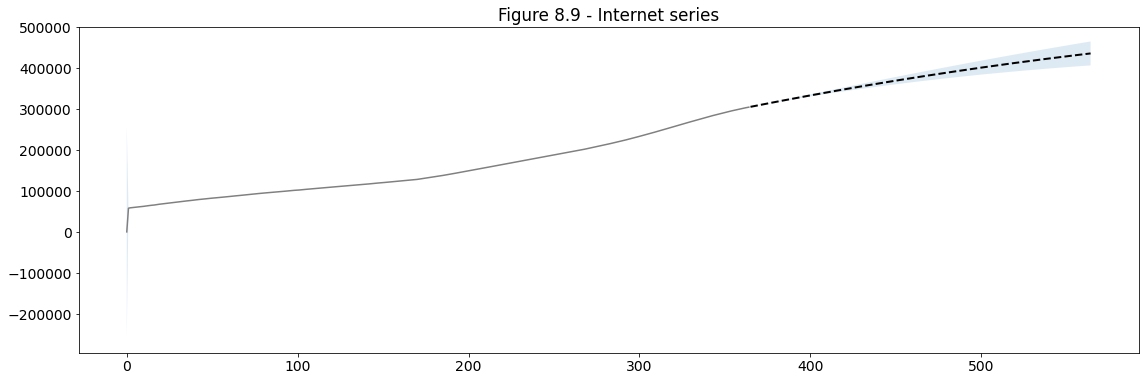

In [70]:
# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 20
predict = res.get_prediction(end=mod.nobs + nforecast)
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)
# print(predict_ci.get("lower Deaths").values)
# Graph
fig, ax = plt.subplots(figsize=(19,6))
# ax.xaxis.grid()
# ax.plot(y, 'k.')
# Plot
ax.plot(idx[:-nforecast], predict.predicted_mean[:-nforecast], 'gray')
ax.plot(idx[-nforecast:], predict.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
try:
    ax.fill_between(idx, predict_ci.get("lower Deaths").values, predict_ci.get("upper Deaths").values, alpha=0.15)
except:
    ax.fill_between(idx, predict_ci.get("lower Смертей").values, predict_ci.get("upper Смертей").values, alpha=0.15)
ax.set(title='Figure 8.9 - Internet series')
plt.show()